# Predicting the quality of red wine

In [1]:
#Importing required packages.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.tree as tree
%matplotlib inline

#### Load winequality-red.csv and display first few rows

In [2]:
df = pd.read_csv("winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#### Get info about the columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


#### Get statistical descriptions of columns

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


## EDA

#### Make a plot showing how many wines have each quality value.

<AxesSubplot:xlabel='quality', ylabel='count'>

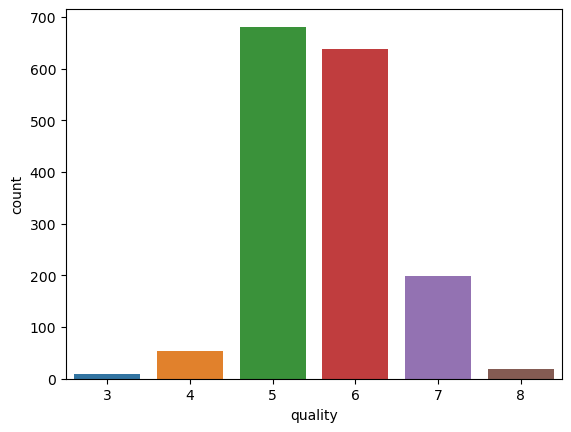

In [10]:
sns.countplot(data=df, x='quality')

#### Now we will make plots of the wine quality showing the distribution according to values of each of the other variables. Instead of countplot that takes one variable and counts how many times it appears in the dataset, we will use barplot , which takes two variables. We will keep quality on the x axis and the other variable on the y axis. The y axis shows the mean of the variable for each value of quality.

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

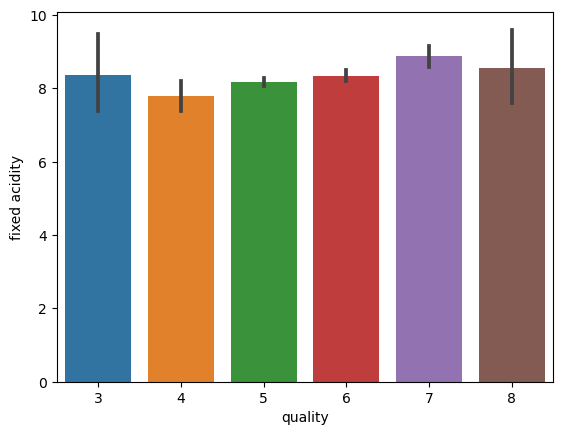

In [12]:
sns.barplot(data=df,x='quality', y='fixed acidity')

#### This shows that on average, the fixed acidity is nearly uniform over quality values so it won't be a good predictor. 

####  If we wanted to compare the actual distributions of fixed acidity by quality we could make boxplots:

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

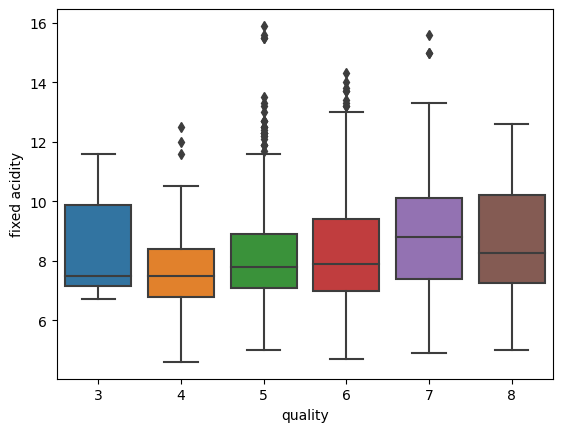

In [13]:
sns.boxplot(data=df,x='quality', y='fixed acidity' )

#### Now make barplots for all the other variables by quality

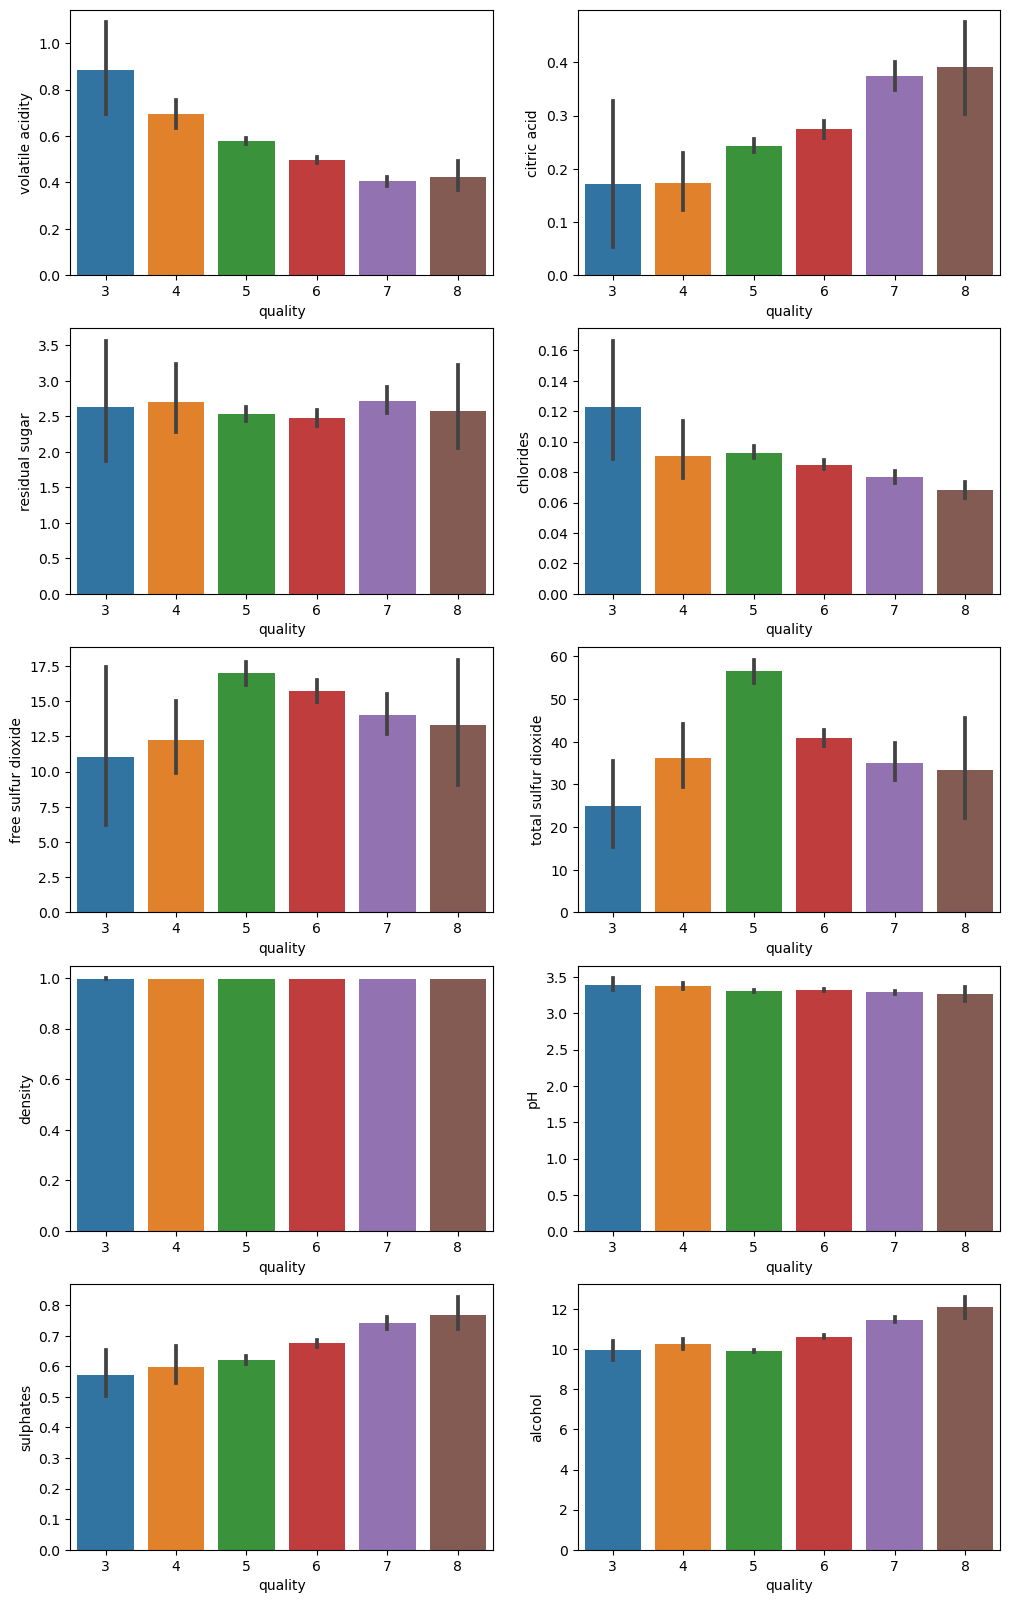

In [14]:
fig,axes=plt.subplots(5,2,figsize=(12,20))
for var, ax in zip(df.columns[1:11],axes.flat):
    sns.barplot(x='quality',y=var,data=df,ax=ax)
    

#### Which variables will be useful features? Make a list

In [15]:
#CODE HERE

#### Make a heatmap of the correlations between the useful features

<AxesSubplot:>

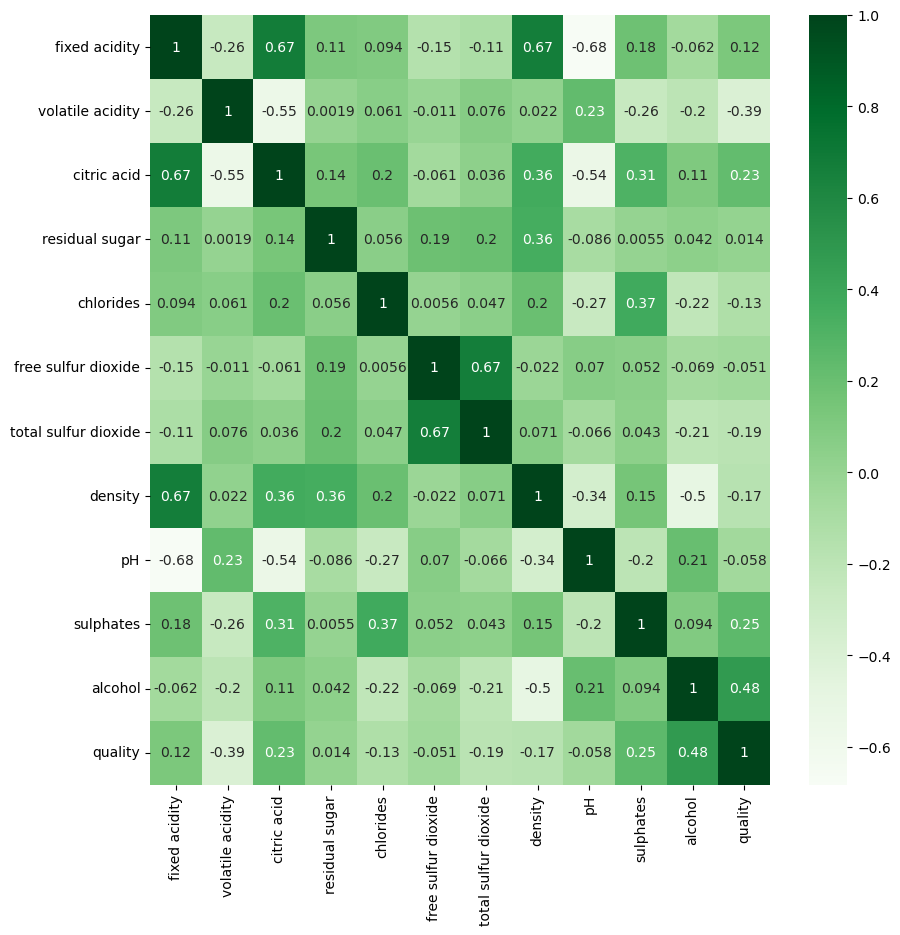

In [31]:
plt.figure(figsize=[10, 10])
sns.heatmap(df.corr(),annot=True,cmap = 'Greens')

#### Split into train and test sets

<AxesSubplot:xlabel='citric acid', ylabel='fixed acidity'>

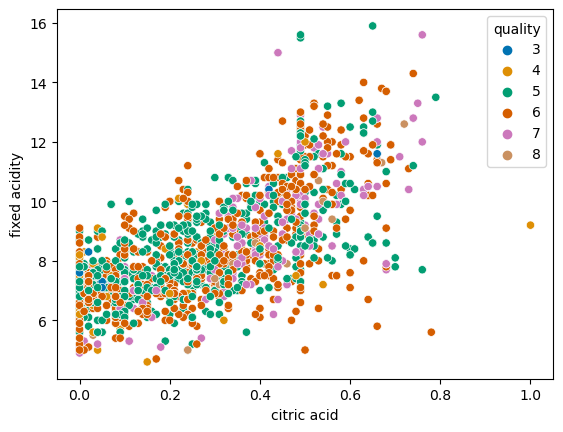

In [32]:
sns.scatterplot(data=df, x='citric acid', y='fixed acidity' , hue='quality', palette='colorblind')

In [34]:
X_train , X_test,y_train,y_test=train_test_split(df.drop('quality', axis=1) ,df.quality, test_size=0.3, random_state=42)

#### Now we can make a TreeRegressor and use it to train the data. You can see  what are default arguments at [https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html]

In [35]:
reg = tree.DecisionTreeRegressor(max_depth=3 , min_samples_leaf=2, random_state=42)
reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, min_samples_leaf=2, random_state=42)

#### Plot tree diagram

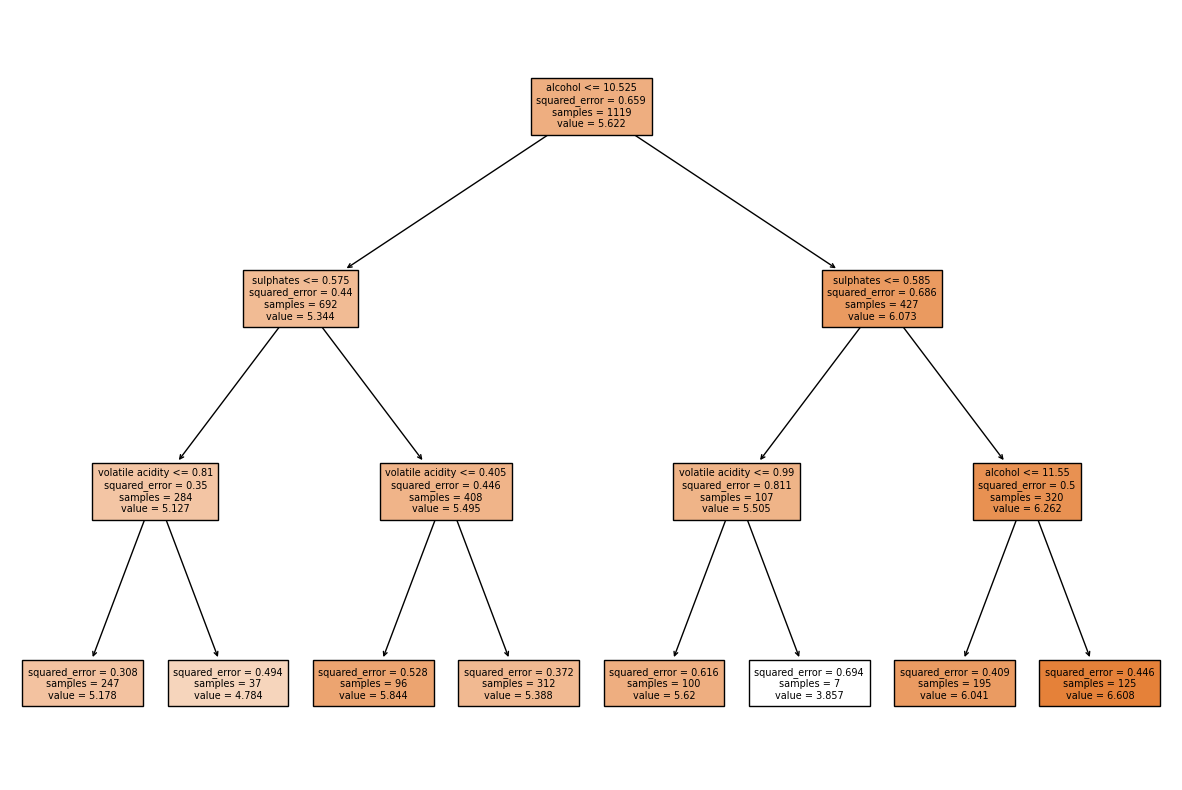

In [47]:
fig, axes = plt.subplots(1,1, figsize=(15,10))

tree.plot_tree(reg, feature_names = list(X_train.columns), filled = True,fontsize=7)
fig.savefig('imagename.png')

####  Because the data is imbalanced the tree has not learn how to predict low or high quality
#### Predict anyway and calculate R^2 and mse for train and test sets

In [48]:
from sklearn.metrics import mean_squared_error, r2_score
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)
print('MSE for train '+str(mean_squared_error(y_train, y_train_pred)))
print('MSE for test '+str(mean_squared_error(y_test, y_test_pred)))
print('R2 for train '+str(r2_score(y_train, y_train_pred)))
print('R2 for test '+str(r2_score(y_test, y_test_pred)))

MSE for train 0.41380082150827885
MSE for test 0.481760734256734
R2 for train 0.37180352120523164
R2 for test 0.2401531145972282


#### The actual Y values are whole numbers. If we round the predictions we can check how many were predicted correctly for each value.

In [49]:
train_correct = pd.DataFrame({'y':y_train,'pred':y_train_pred.round().astype(int)})
train_correct['correct']=np.where(train_correct.y == train_correct.pred,1,0)
train_correct.head()

,y,pred,correct
925,7,6,0
363,5,5,1
906,5,6,0
426,6,6,1
1251,5,5,1


In [64]:
train_acc = pd.DataFrame({'number_correct':train_correct.correct.groupby(train_correct.y).sum(),
                          'total':train_correct.y.value_counts()})

train_acc['percent']= train_acc['number_correct'] / train_acc['total'] *100
train_acc['number_correct'].sum()/train_acc['total'].sum()*100
train_acc

,number_correct,total,percent
3,0,9,0.000000
4,2,36,5.555556
5,386,486,79.423868
6,224,438,51.141553
7,65,138,47.101449
8,0,12,0.000000


In [66]:
test_correct = pd.DataFrame({'y':y_test,'pred':y_test_pred.round().astype(int)})
test_correct['correct']=np.where(test_correct.y == test_correct.pred,1,0)
test_correct.head()


,y,pred,correct
803,6,5,0
124,5,5,1
350,6,5,0
682,5,5,1
1326,6,6,1


In [67]:
test_acc = pd.DataFrame({'number_correct':test_correct.correct.groupby(test_correct.y).sum(),
                          'total':test_correct.y.value_counts()})

test_acc['percent']= test_acc['number_correct'] / test_acc['total'] *100
test_acc['number_correct'].sum()/test_acc['total'].sum()*100
test_acc

,number_correct,total,percent
3,0,1,0.000000
4,1,17,5.882353
5,145,195,74.358974
6,88,200,44.000000
7,21,61,34.426230
8,0,6,0.000000


#### Can we improve the results by tuning arguments?

In [69]:
reg = tree.DecisionTreeRegressor(max_depth=4 , min_samples_leaf=2, random_state=42)
reg.fit(X_train, y_train)
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)
print('MSE for train '+str(mean_squared_error(y_train, y_train_pred)))
print('MSE for test '+str(mean_squared_error(y_test, y_test_pred)))
print('R2 for train '+str(r2_score(y_train, y_train_pred)))
print('R2 for test '+str(r2_score(y_test, y_test_pred)))


MSE for train 0.3651121901628484
MSE for test 0.4664900712170368
R2 for train 0.4457183739042955
R2 for test 0.2642384435243583


In [70]:
train_correct = pd.DataFrame({'y':y_train,'pred':y_train_pred.round().astype(int)})
train_correct['correct']=np.where(train_correct.y == train_correct.pred,1,0)
train_correct.head()
train_acc = pd.DataFrame({'number_correct':train_correct.correct.groupby(train_correct.y).sum(),
                          'total':train_correct.y.value_counts()})

train_acc['percent']= train_acc['number_correct'] / train_acc['total'] *100
train_acc['number_correct'].sum()/train_acc['total'].sum()*100
train_acc

,number_correct,total,percent
3,3,9,33.333333
4,4,36,11.111111
5,417,486,85.802469
6,220,438,50.228311
7,49,138,35.507246
8,0,12,0.000000


In [71]:
test_correct = pd.DataFrame({'y':y_test,'pred':y_test_pred.round().astype(int)})
test_correct['correct']=np.where(test_correct.y == test_correct.pred,1,0)
test_correct.head()
test_acc = pd.DataFrame({'number_correct':test_correct.correct.groupby(test_correct.y).sum(),
                          'total':test_correct.y.value_counts()})

test_acc['percent']= test_acc['number_correct'] / test_acc['total'] *100
test_acc['number_correct'].sum()/test_acc['total'].sum()*100
test_acc

,number_correct,total,percent
3,0,1,0.000000
4,1,17,5.882353
5,159,195,81.538462
6,82,200,41.000000
7,15,61,24.590164
8,0,6,0.000000


#### We could also try linear regressiom to compare

In [74]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(X_train, y_train)
y_train_pred = lreg.predict(X_train)
y_test_pred = lreg.predict(X_test)
print('MSE for train '+str(mean_squared_error(y_train, y_train_pred)))
print('MSE for test '+str(mean_squared_error(y_test, y_test_pred)))
print('R2 for train '+str(r2_score(y_train, y_train_pred)))
print('R2 for test '+str(r2_score(y_test, y_test_pred)))


MSE for train 0.42078664921236164
MSE for test 0.41123487175042056
R2 for train 0.36119824413213164
R2 for test 0.35138853325052266


In [75]:
train_correct = pd.DataFrame({'y':y_train,'pred':y_train_pred.round().astype(int)})
train_correct['correct']=np.where(train_correct.y == train_correct.pred,1,0)
train_correct.head()
train_acc = pd.DataFrame({'number_correct':train_correct.correct.groupby(train_correct.y).sum(),
                          'total':train_correct.y.value_counts()})

train_acc['percent']= train_acc['number_correct'] / train_acc['total'] *100
train_acc['number_correct'].sum()/train_acc['total'].sum()*100
train_acc

,number_correct,total,percent
3,0,9,0.000000
4,0,36,0.000000
5,343,486,70.576132
6,296,438,67.579909
7,30,138,21.739130
8,0,12,0.000000


In [76]:
test_correct = pd.DataFrame({'y':y_test,'pred':y_test_pred.round().astype(int)})
test_correct['correct']=np.where(test_correct.y == test_correct.pred,1,0)
test_correct.head()
test_acc = pd.DataFrame({'number_correct':test_correct.correct.groupby(test_correct.y).sum(),
                          'total':test_correct.y.value_counts()})

test_acc['percent']= test_acc['number_correct'] / test_acc['total'] *100
test_acc['number_correct'].sum()/test_acc['total'].sum()*100
test_acc

,number_correct,total,percent
3,0,1,0.000000
4,0,17,0.000000
5,137,195,70.256410
6,131,200,65.500000
7,9,61,14.754098
8,0,6,0.000000


#### Make histogram of residuals

(array([  3.,  19.,  63.,  92., 104., 129.,  46.,  17.,   5.,   2.]),
 array([-1.89409962, -1.47947455, -1.06484947, -0.65022439, -0.23559932,
         0.17902576,  0.59365084,  1.00827591,  1.42290099,  1.83752607,
         2.25215114]),
 <BarContainer object of 10 artists>)

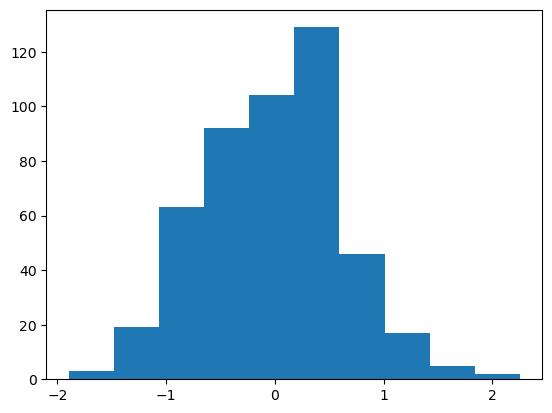

In [77]:
plt.hist( y_test_pred-y_test)